# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | setif
Processing Record 2 of Set 1 | zouerate
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | baijiantan
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | akureyri
Processing Record 12 of Set 1 | taroudant
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | arinos
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | nkowakowa
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | port moresby
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | bethe

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,setif,36.1911,5.4137,11.45,47,0,1.54,DZ,1697090108
1,zouerate,22.7187,-12.4521,24.92,16,30,3.63,MR,1697090108
2,port mathurin,-19.6833,63.4167,23.76,76,46,5.12,MU,1697090108
3,baijiantan,45.6333,85.1833,24.00,25,2,3.81,CN,1697090109
4,ust-nera,64.5667,143.2000,-7.10,92,100,1.34,RU,1697090109


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,setif,36.1911,5.4137,11.45,47,0,1.54,DZ,1697090108
1,zouerate,22.7187,-12.4521,24.92,16,30,3.63,MR,1697090108
2,port mathurin,-19.6833,63.4167,23.76,76,46,5.12,MU,1697090108
3,baijiantan,45.6333,85.1833,24.00,25,2,3.81,CN,1697090109
4,ust-nera,64.5667,143.2000,-7.10,92,100,1.34,RU,1697090109


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

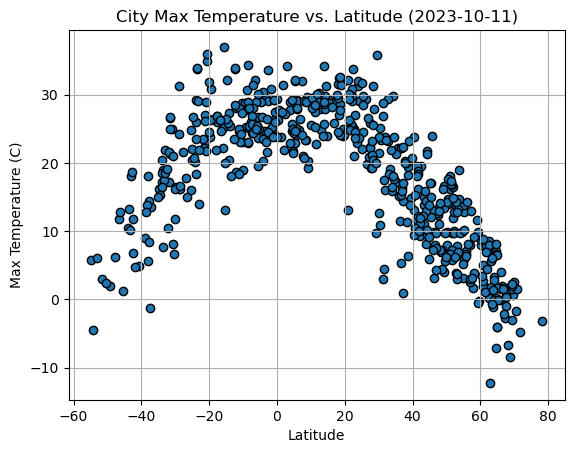

In [58]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Temperature vs. Latitude (2023-10-11)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

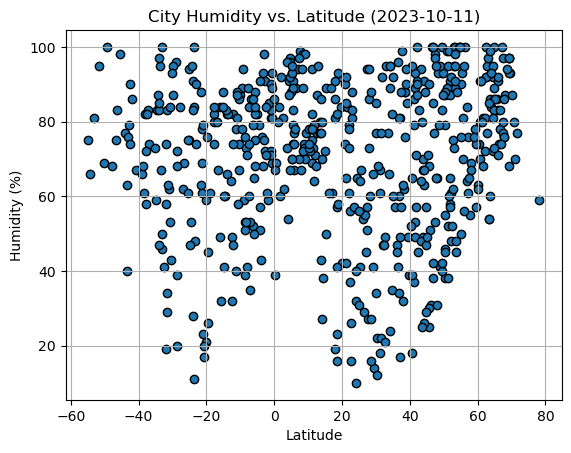

In [59]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Humidity vs. Latitude (2023-10-11)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

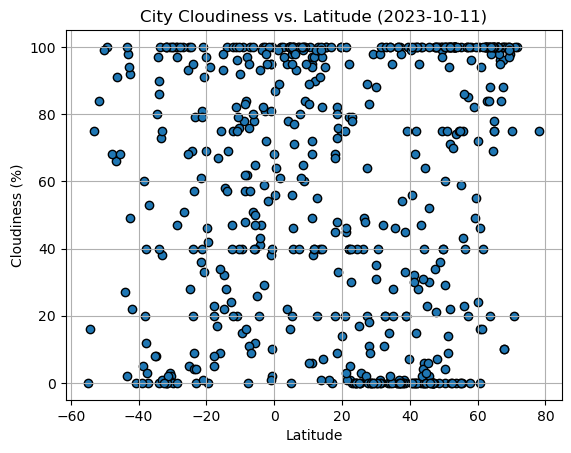

In [60]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Cloudiness vs. Latitude (2023-10-11)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

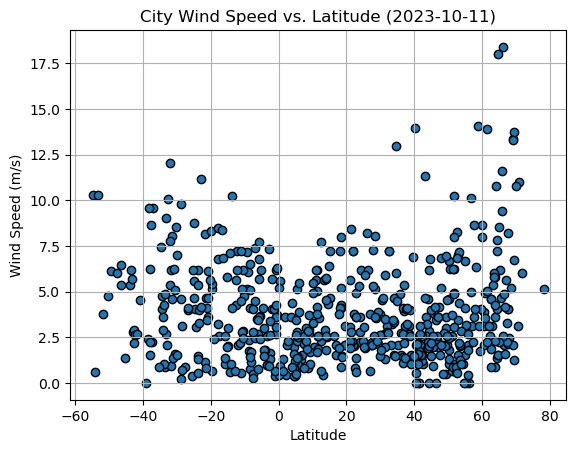

In [61]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Wind Speed vs. Latitude (2023-10-11)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def plot_regression(data_df,x,y):
    x_values = data_df[x]
    y_values = data_df[y]
    plt.scatter(x_values,y_values, edgecolor='black')

    # Incorporate the other graph properties
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs. {x}")
    # plt.grid()

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+5,min(y_values)+5),fontsize=15,color="red")  
    # plt.annotate(line_eq,va="left", ha="bottom",fontsize=15,color="red")    

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()
    


In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,setif,36.1911,5.4137,11.45,47,0,1.54,DZ,1697090108
1,zouerate,22.7187,-12.4521,24.92,16,30,3.63,MR,1697090108
3,baijiantan,45.6333,85.1833,24.00,25,2,3.81,CN,1697090109
4,ust-nera,64.5667,143.2000,-7.10,92,100,1.34,RU,1697090109
7,wailua homesteads,22.0669,-159.3780,25.44,79,40,7.20,US,1697090109


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port mathurin,-19.6833,63.4167,23.76,76,46,5.12,MU,1697090108
5,port-aux-francais,-49.3500,70.2167,2.03,100,100,6.15,TF,1697090109
6,ushuaia,-54.8000,-68.3000,5.81,75,0,10.29,AR,1697090026
9,puerto ayora,-0.7393,-90.3518,24.19,93,100,2.68,EC,1697090110
15,arinos,-15.9169,-46.1056,25.04,49,9,1.01,BR,1697090111


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7711763282778155


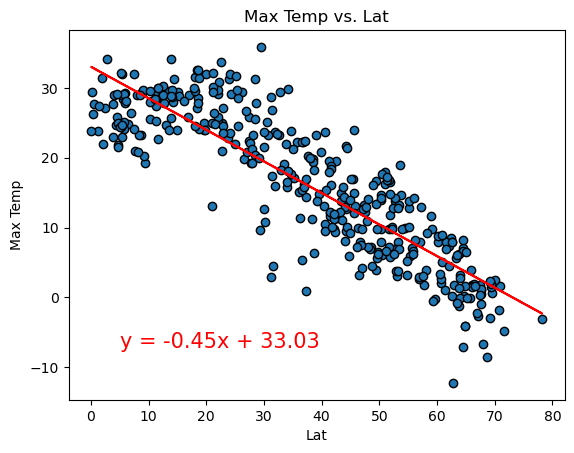

In [65]:
# Linear regression on Northern Hemisphere
plot_regression(northern_hemi_df,'Lat','Max Temp')

R squared: 0.5491858915472525


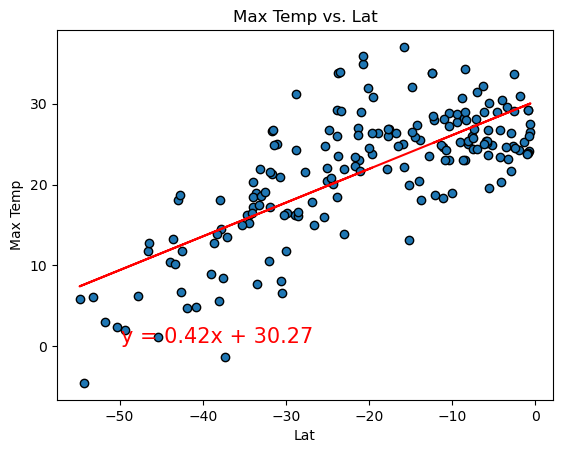

In [66]:
# Linear regression on Southern Hemisphere
plot_regression(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** 
There seems to be a negative correlation between the latitude and the Max Temp in the northern hemisphere and a positive correlation in the southern hemisphere. Said differently, it gets colder the furthest one is from the equator, which was already hinted by the scatter plot in figure 1.
With a R-square value of respectively 0.77 and 0.55, the linear regression seems to better predict the relationship between the latitude and the max temperature in the northern hemisphere than in the southern one. It is to be noted though that our dataset has more than twice the number of points in the northern hemisphere (391 vs. 185), which may contribute to the slightly poorer fit in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.011271632710149306


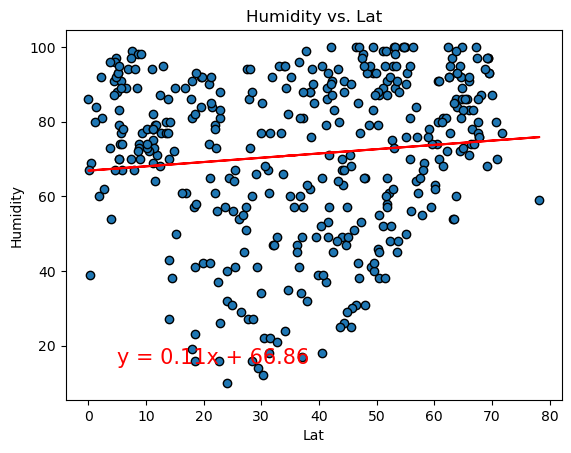

In [47]:
# Northern Hemisphere
plot_regression(northern_hemi_df,'Lat','Humidity')

R squared: 3.2878912049157203e-07


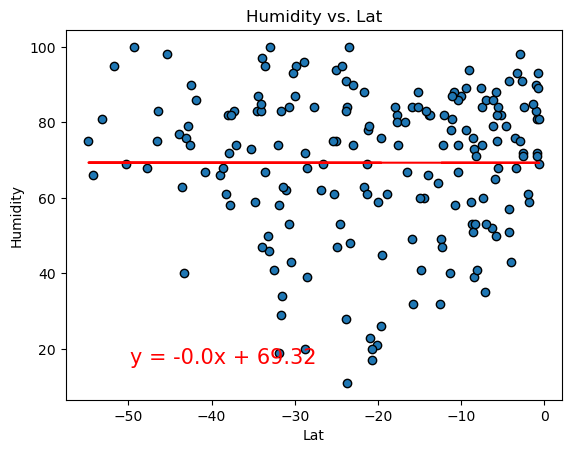

In [48]:
# Southern Hemisphere
plot_regression(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** 
With R-squared values <0.01, there seems to be no correlation between the latitude and the humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.007461752620272351


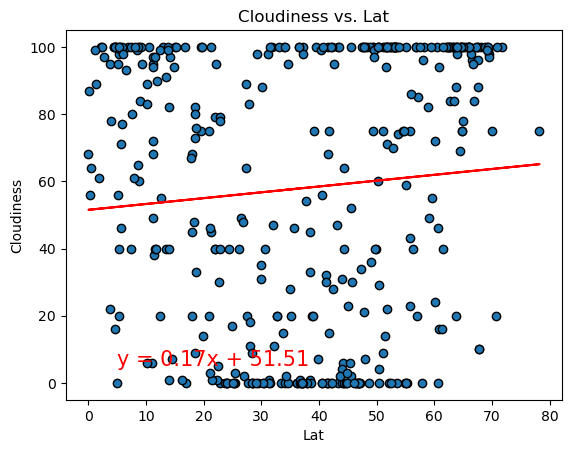

In [49]:
# Northern Hemisphere
plot_regression(northern_hemi_df,'Lat','Cloudiness')

R squared: 0.01222106406121333


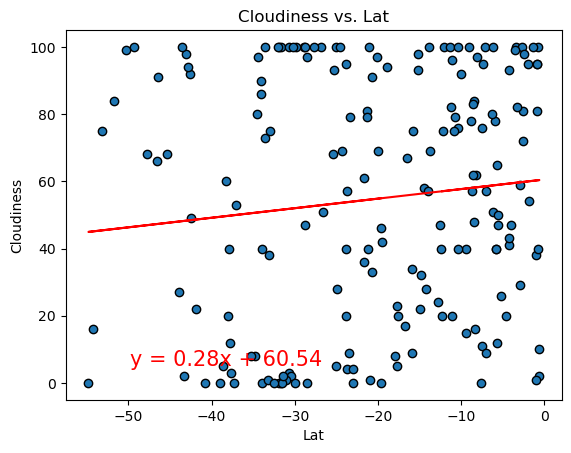

In [50]:
# Southern Hemisphere
plot_regression(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** 
With R-squared values <0.01, there seems to be no correlation between the latitude and the cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.06462720655320184


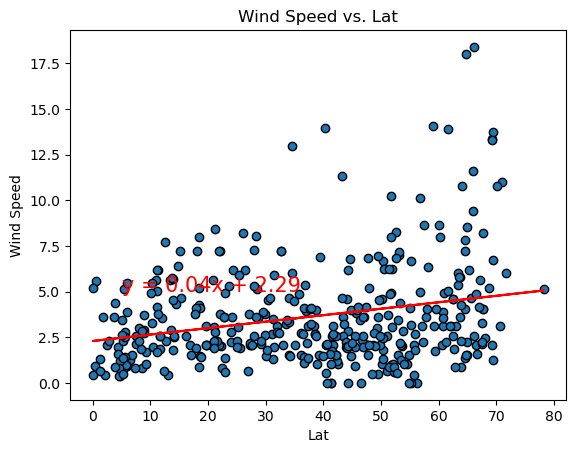

In [51]:
# Northern Hemisphere
plot_regression(northern_hemi_df,'Lat','Wind Speed')

R squared: 0.03655547550251389


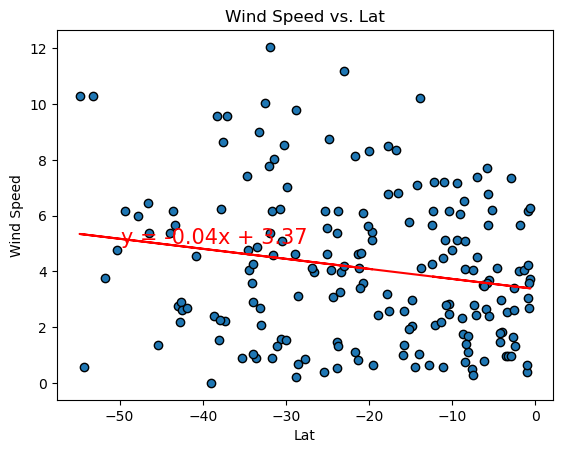

In [52]:
# Southern Hemisphere
plot_regression(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** 
With R-squared values <0.07, there seems to be a very weak to no correlation between the latitude and the wind speed in both hemispheres.